[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W5/W5P1.ipynb)

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels

#Run the following cell to arm the power of R packages. Though it is embracing for us a bit :..(

In [ ]:
!apt-get install r-base
!pip install rpy2
###Above we are pip installing a bridge between r and pyhton
import rpy2 # import rpy2's package module
from rpy2.robjects.packages import importr
utils = importr('utils')
import rpy2.robjects.packages as rpackages
utils.install_packages("TSA")
# import R's utility package
utils = rpackages.importr('TSA')  ### Time series analysis lib. is to be imported
import rpy2.robjects as robjects
r = robjects.r

Reading package lists... Done
Building dependency tree       
Reading state information... Done
r-base is already the newest version (4.2.1-2.1804.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(as ‘lib’ is unspecified)

















































	‘/tmp/RtmpmXEd5f/downloaded_packages’



### We are now ready to do our analysis. Let's use the dataset!



In [ ]:
def to_dataframe(text: str):
    """
    
    Parameters
    ----------
    text : this dude is a text file (a string actually).

    Returns
    -------
    Pandas dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    
    L = L.apply(pd.to_numeric)
    L.columns = headers
    return L

def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
  !unzip "/content/ch2data.zip" -d "/content/ch2data/"
  if not os.getcwd() == '/content/ch2data':
    os.chdir("ch2data")
  else:
    print(f"Current directory is now {os.getcwd()}")

download_data()    


--2022-10-15 13:21:29--  https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
Resolving faculty.chicagobooth.edu (faculty.chicagobooth.edu)... 128.135.211.142
Connecting to faculty.chicagobooth.edu (faculty.chicagobooth.edu)|128.135.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 557379 (544K) [application/x-zip-compressed]
Saving to: ‘ch2data.zip’

ch2data.zip         100%[===================>] 544.32K   343KB/s    in 1.6s    

2022-10-15 13:21:30 (343 KB/s) - ‘ch2data.zip’ saved [557379/557379]

Archive:  /content/ch2data.zip
  inflating: /content/ch2data/d-aapl0305.txt  
  inflating: /content/ch2data/d-ibm3dx7008.txt  
  inflating: /content/ch2data/d-sp55008.txt  
  inflating: /content/ch2data/d-vix0810.txt  
  inflating: /content/ch2data/m-3m4608.txt  
  inflating: /content/ch2data/m-aaa-1911.txt  
  inflating: /content/ch2data/m-baa-1911.txt  
  inflating: /content/ch2data/m-dec125910-6111.txt  
  inflating: /c

In [ ]:
data = to_dataframe("m-3m4608.txt")

In [ ]:
data

,date,rtn
0,19460228,-0.077922
1,19460330,0.018592
2,19460430,-0.100000
3,19460531,0.209877
4,19460628,0.005128
...,...,...
750,20080829,0.024293
751,20080930,-0.045950
752,20081031,-0.058703
753,20081128,0.048678


In [ ]:
data_ = data["rtn"]
log_ = lambda x: np.log(x+1)
data_ = data_.apply(log_)

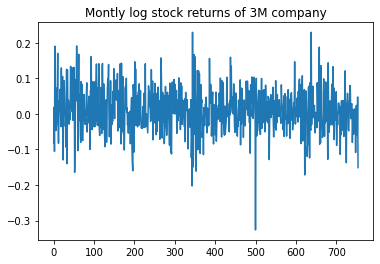

In [ ]:
plt.plot(data_)
plt.title("Montly log stock returns of 3M company")
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

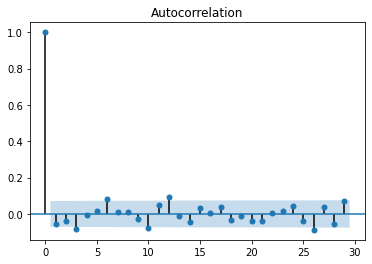

In [ ]:
plot_acf(data_);   ### u see nothing special about acf!



```
# Question: By just looking at ACF and plot of data what sort of ARMA model would you use?
```



#It is time to use R together with some agony, pain and tears.

In [ ]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

In [ ]:
m = utils.eacf(pandas2ri.py2rpy(data_), 6, 12)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12
0 o o x o o x o o o x o  x  o 
1 x o x o o x o o o o o  x  o 
2 x x x o o x o o o o o  o  o 
3 x x x o o o o o o o o  o  o 
4 x o x o o o o o o o o  o  o 
5 x x x o x o o o o o o  o  o 
6 x x x x x o o o o o o  o  o 


In [ ]:
list_ = list(m.items())

In [ ]:
pd.DataFrame(list_[0][1])  ###3 this dude gives the p-values

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.056006,-0.037955,-0.082155,-0.004649,0.017744,0.082066,0.008000,0.012668,-0.030143,-0.077770,0.048766,0.090911,-0.010945
1,-0.473890,0.009580,-0.073581,-0.020897,0.001963,0.077215,-0.028761,0.002590,-0.006832,-0.069366,0.037215,0.093835,-0.024237
2,-0.383212,-0.347592,-0.073685,0.015954,-0.005528,0.077196,0.026938,0.011967,0.000449,-0.026783,0.022092,0.042844,0.041845
3,-0.177273,0.138106,0.383815,-0.022399,0.002324,0.041921,-0.023187,0.015420,-0.004405,-0.025365,0.018490,0.010020,0.043271
4,0.420996,0.028729,0.454222,-0.007866,0.000711,0.002542,-0.014017,0.030520,0.011587,0.004217,0.019102,-0.004341,0.013277
5,-0.113664,0.213525,0.448987,0.009578,0.202415,-0.006270,-0.003789,0.040321,-0.012936,-0.012330,0.031500,0.011724,0.027656
6,-0.207708,-0.250368,0.243079,0.311092,0.167446,-0.038755,-0.003383,0.042918,-0.010090,-0.025996,0.007816,0.010557,0.037279
